### Loading the libraries

In [1]:
#%pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading the image as grayscale

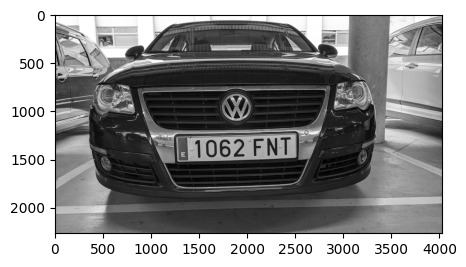

In [2]:
image_path = "C:/Users/ainav/OneDrive/Documents/Uni/3rd_year/1st_semester/vision&learning/challenge1/Licence-Plates-Challenge/Test/Test/Frontal/Frontal/1062FNT.jpg"

image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(5, 3))
ax.imshow(image_gray, cmap= 'gray')



### Applying blackhat operation

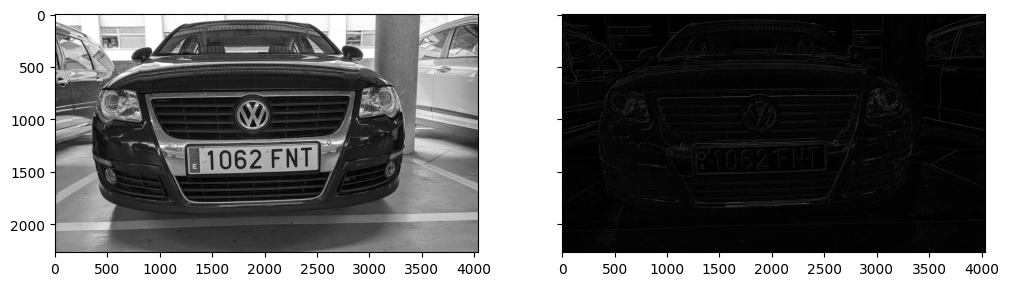

In [20]:
kernel = np.ones((4, 4))
blackhat_im = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_gray,  cmap = 'gray')
ax2.imshow(blackhat_im, cmap = 'gray')

### Applying tophat operation

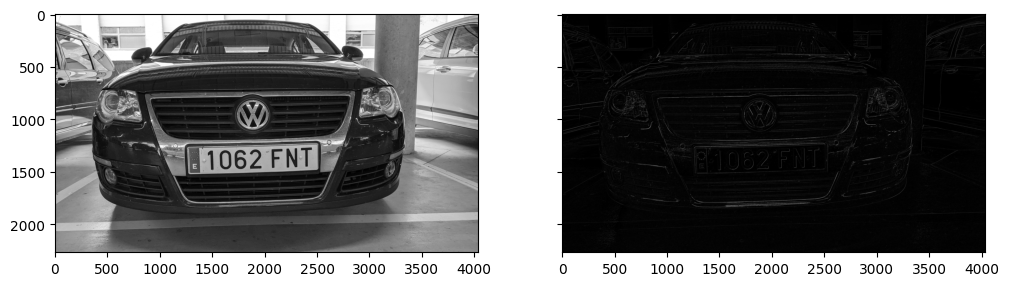

In [23]:
kernel = np.ones((4, 4))
blackhat_im = cv2.morphologyEx(image_gray, cv2.MORPH_TOPHAT, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_gray,  cmap = 'gray')
ax2.imshow(blackhat_im, cmap = 'gray')

### lab3 computer vision

#### detection of specific region

In [ ]:
def visualize (images, names):
  fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
  for i in range(len(images)):
      axes[i].imshow(images[i], cmap='gray')
      axes[i].set_title(names[i])
      axes[i].axis("off")
  # plt.suptitle(kernel_names[j])
  plt.tight_layout()
  plt.show()


#DEFECT DETECTION CIRCLE
def defect_circle(img, real_mask):
  _, thresholded_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  otsu_image = cv2.bitwise_not(thresholded_image)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,30))
  opened_image = cv2.morphologyEx(otsu_image, cv2.MORPH_OPEN, kernel, iterations=1)
  visualize([img, otsu_image, opened_image, real_mask],["Original image", "Thresholded Otsu image", "Our Mask", "Real Mask"])
  return opened_image

#MAIN
circle = cv2.imread("/content/000.png", cv2.IMREAD_GRAYSCALE)
true_mask = cv2.imread("/content/000_mask.png", cv2.IMREAD_GRAYSCALE)
mask = defect_circle(circle, true_mask)

#### edge-based segmentation

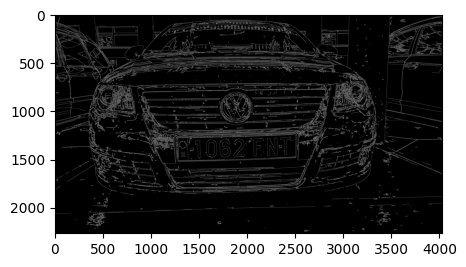

In [26]:
low_thresh = 30
high_thresh = 200

canny = cv2.Canny(image_gray, low_thresh, high_thresh)

fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(5, 3))
ax.imshow(canny, cmap= 'gray')
